### Toymodel Train Test Evaluation

In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=''
import numpy as np
import torch
from torch import nn
from mapsgan import cVAESolver, BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
from mapsgan.losses import kl_loss
from torch import optim
torch.cuda.is_available()

env: CUDA_VISIBLE_DEVICES=''


False

#### Set up dataloader, model, solver

In [2]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir,
                                  shuffle=True)
_, testloader = data_loader(in_len=8, out_len=12, batch_size=1, num_workers=1, path=experiment.test_dir,
                                  shuffle=False)

In [3]:
generator = BicycleGenerator(generator=ToyGenerator, start_mode='cvae')
discriminator = ToyDiscriminator()

In [4]:
solver = cVAESolver(generator, discriminator, 
                loss_fns={'traj': nn.L1Loss, 'disc': nn.BCEWithLogitsLoss, 'kl':kl_loss},
                optims_args={'generator': {'lr': 1e-3}, 'discriminator': {'lr': 1e-3}, 'encoder':{'lr':1e-3}})

#### Training

In [5]:
solver.train(trainloader, epochs = 500, checkpoint_every=10, print_every=10, val_every=10, testloader=testloader, steps = {'generator': 1, 'discriminator': 1})

Training new model

       Generator Losses              Discriminator Losses
Epochs G_BCE     G_L1      G_KL      D_Real    D_Fake    
500    0.675     0.288     63.891    0.677     0.710     
490    0.681     0.230     3.797     0.688     0.703     
480    0.689     0.205     1.327     0.685     0.700     
470    0.690     0.149     0.359     0.677     0.698     
460    0.690     0.120     0.214     0.678     0.698     
450    0.689     0.120     0.121     0.680     0.700     
440    0.692     0.109     0.077     0.682     0.696     
430    0.692     0.111     0.056     0.677     0.696     
420    0.693     0.106     0.040     0.687     0.693     
410    0.693     0.104     0.036     0.672     0.695     
400    0.691     0.103     0.030     0.669     0.693     
390    0.692     0.106     0.026     0.658     0.694     
380    0.693     0.093     0.023     0.667     0.695     
370    0.692     0.100     0.021     0.667     0.695     
360    0.693     0.100     0.017     0.673     0.694

In [6]:
solver.train(trainloader, epochs = 500, checkpoint_every=10, print_every=10, val_every=10, testloader=testloader, steps = {'generator': 1, 'discriminator': 1})

Training new model

       Generator Losses              Discriminator Losses
Epochs G_BCE     G_L1      G_KL      D_Real    D_Fake    
500    0.580     0.248     46.955    0.621     0.895     
490    0.561     0.244     2.598     0.621     0.877     
480    0.636     0.166     0.834     0.542     0.821     
470    0.641     0.160     0.384     0.518     0.797     
460    0.666     0.135     0.185     0.558     0.794     
450    0.616     0.128     0.109     0.643     0.773     
440    0.647     0.134     0.073     0.585     0.789     
430    0.543     0.128     0.054     0.583     0.843     
420    0.614     0.160     0.037     0.561     0.876     
410    0.653     0.160     0.034     0.615     0.807     
400    0.634     0.120     0.027     0.615     0.820     
390    0.629     0.113     0.024     0.616     0.782     
380    0.657     0.115     0.021     0.619     0.750     
370    0.646     0.115     0.017     0.660     0.741     
360    0.667     0.116     0.015     0.650     0.727

#### Test

In [7]:
output = solver.test(trainloader)

#### Evaluation
visualization of predicted trajectories

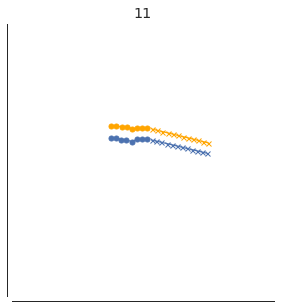

In [13]:
vis = Visualization()
ll = vis.trajectories(output, scenes=[11])

### Diversity Plot